In [1]:
# Goal --> To find Driving factors/indicators leading to Loan Default based on *loan* Dataset

# import panda and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Load the loan dataset which is a *Private Dataset*
df = pd.read_csv(r"C:\Users\Hp\anaconda3\dataset\loan.csv")

# Dump Metadata and info for Sanity Check 
#print(df.describe())
#print(df.info())

# Total rows or Elements in the sheet (39717)
totelem = df.shape
#print(totelem)

# Delete a Column if it has more than 60% (> na_del_criteria 23830) of missing values 
na_del_criteria = round(totelem[0] * 0.60)
print(na_del_criteria)

# Based on describe and info dumps below observations are found
# Fixing Rows and Columns - Multiple Columns are not useful for Data analysis and can be removed like
### url, desc columns can be removed
df=df.drop(labels="url", axis=1)
df=df.drop(labels="desc", axis=1)

# emp_title column had to be removed as it has not much charecteristics to derive any meaningful data
df=df.drop(labels="emp_title", axis=1)

# Missing and Invalid Value checks --> Multiple columns are having missing values and just 1 unique value can be removed as below
## Traverse through each column and then perform below operations
### All the columns with nunique value as 1 .i.e same value throughout the column can be removed
### All the columns which has missing values > 60% of the overall rows (elements) can be removed
for col in df.columns:
    num_na = df[col].isna().sum(axis=0)
    num_uni = df[col].nunique()
    if((num_na > na_del_criteria) or (num_uni < 2)):
        df = df.drop(labels=col, axis=1)

# Columns reduced to 42 from earlier 111 --> (39717, 42)
print(df.shape)

# Data Standardization - Below columns in the dataset needs to be updated 
## term - remove "months" , int_rate remove "%" , emp_length remove "years", "+","<" , zip_code remove "xx" , revol_util remove "%",

df["term"]=df["term"].replace(to_replace="months", value="",regex=True)
df["int_rate"]=df["int_rate"].replace(to_replace="%", value="",regex=True)
df["emp_length"]=df["emp_length"].replace(to_replace="year", value="",regex=True)
df["emp_length"]=df["emp_length"].replace(to_replace="s", value="",regex=True)
df["emp_length"]=df["emp_length"].replace(to_replace="<", value="",regex=True)
df["emp_length"]=df["emp_length"].replace(to_replace="\\+", value="",regex=True)
df["zip_code"]=df["zip_code"].replace(to_replace="xx", value="",regex=True)
df["revol_util"]=df["revol_util"].replace(to_replace="%", value="",regex=True)

# Columns reduced to 42 from earlier 111 --> (39717, 42)
print(df.shape)




C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


23830
(39717, 42)
(39717, 42)


<AxesSubplot:title={'center':'Loan Status: 2007-2011'}, ylabel='loan_status'>

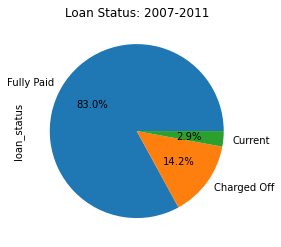

In [2]:
# Univariate Analysis on "loan_status" column
# Pie Chart shows the percentage distribution of Applicants w.r.t loan fully paid , Defaults and Current.

df["loan_status"].value_counts(normalize=True).plot(kind="pie", title='Loan Status: 2007-2011', autopct='%1.1f%%')

# SUMMARY : 83% of applicants have fully paid the loan,  14.2% of applicants have defaulted and 2.9% of applicants have still loan ongoing.


<AxesSubplot:title={'center':'Purpose of Loan'}>

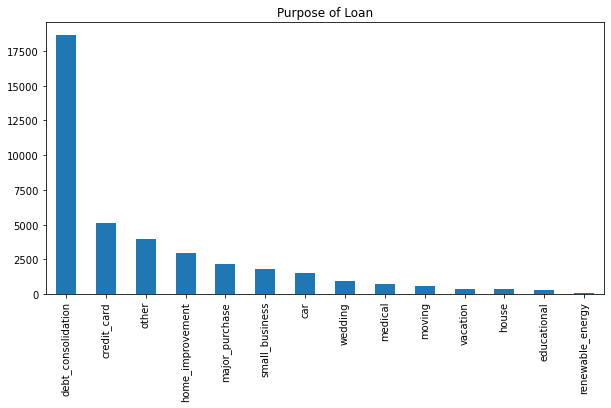

In [3]:
# Univariate Analysis on "Purpose" column
# Bar Chart shows the reason/Purpose of taking the loan 

df["purpose"].value_counts().plot(kind="bar", title='Purpose of Loan', figsize=(10,5))

# SUMMARY - Top 3 Reasons of taking the loans are Debt Consolidation , Credit Card and Other 

# Save the Plot
#plt.savefig("purpose_dist.pdf", dpi=300, bbox_inches='tight')

[3227, 2400]


Text(0.5, 1.0, 'Loan Charged Off V/s Term Duration')

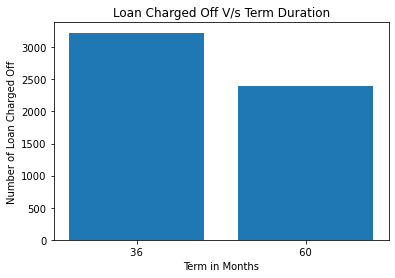

In [4]:
# Segmented Univariate Analysis of Term Duration w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to Term Duration

# get the Unique values in term Duration
term_mnth = df["term"].unique()

Default_Vs_term=[]

# Loop Through each unique value in Term Duration and then Search for Charged Off in Loan Status to get the Count for that Term
for tm in term_mnth:
    term_filter=df[df["term"] == tm]
    Default_Vs_term.append(len(term_filter[term_filter["loan_status"]=="Charged Off"]))

print(Default_Vs_term)
plt.bar(term_mnth, Default_Vs_term)
plt.xlabel("Term in Months")
plt.ylabel("Number of Loan Charged Off")
plt.title("Loan Charged Off V/s Term Duration")

# Save the Plot
#plt.savefig("Term_dist_defaulter.pdf", dpi=100, bbox_inches='tight')

# SUMMARY : helpful in risk assessment : YES
##      More Number of Loan Defaults are observed with Lesser Term Durations .
##      So offering a higher term duration is better to avoid Loan Defaults

Text(0.5, 1.0, 'Loan Charged Off V/s Loan Purpose')

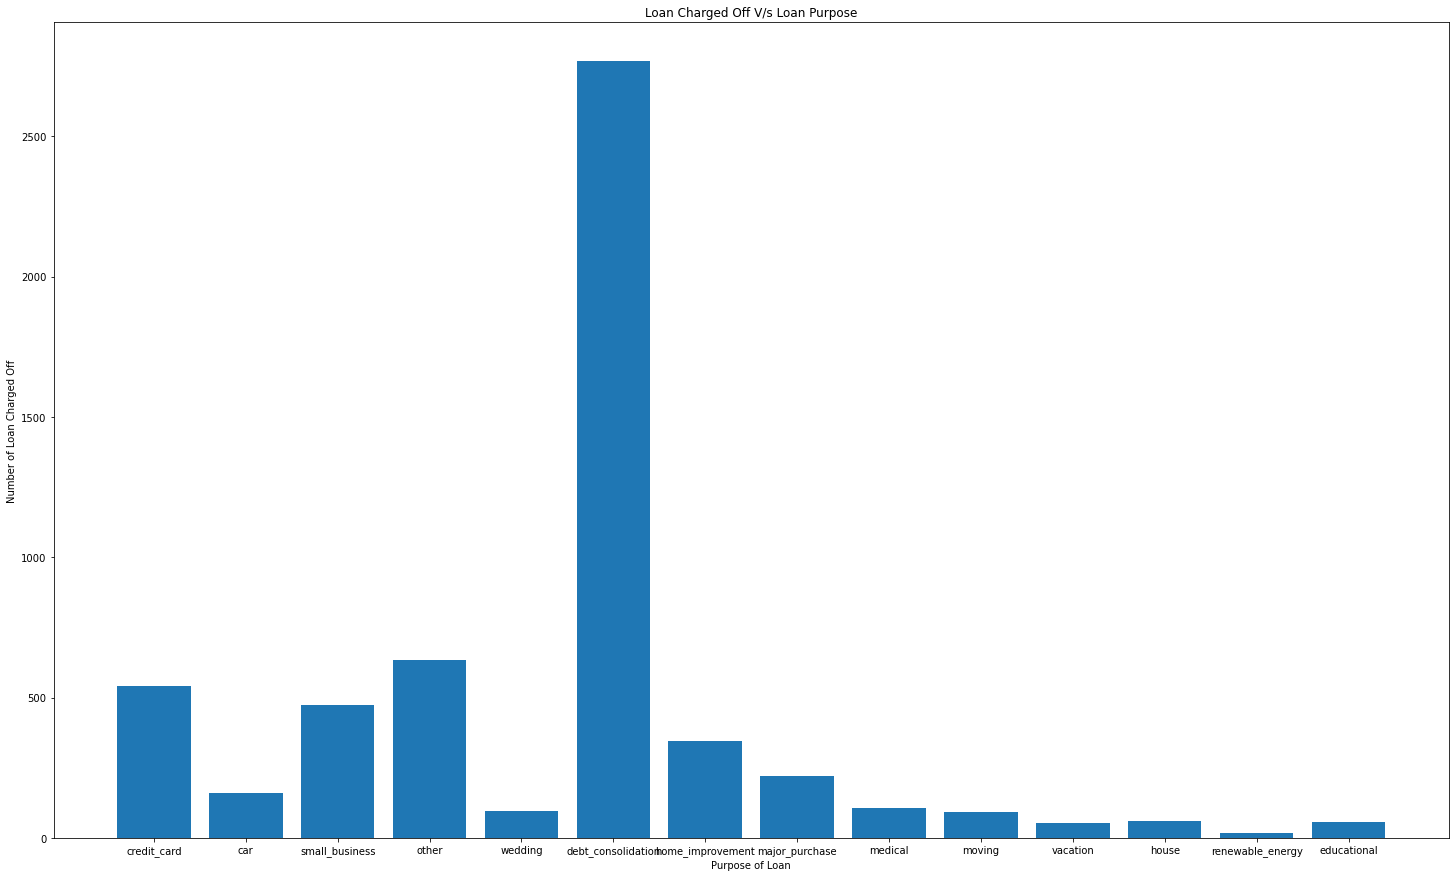

In [13]:
# Segmented Univariate Analysis of Purpose w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to Purpose

# get the Unique values in Purpose
purpose_u = df["purpose"].unique()

Default_Vs_purp=[]

# Loop Through each unique value in Term Duration and then Search for Charged Off in Loan Status to get the Count for that Term
for tm in purpose_u:
    purp_filter=df[df["purpose"] == tm]
    Default_Vs_purp.append(len(purp_filter[purp_filter["loan_status"]=="Charged Off"]))

fig=plt.figure(figsize=(25,15))
plt.bar(purpose_u, Default_Vs_purp)
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loan Charged Off")
plt.title("Loan Charged Off V/s Loan Purpose")

# Save the Plot
#plt.savefig("purpose_dist_defaulter.pdf", dpi=100, bbox_inches='tight')

# SUMMARY : helpful in risk assessment : YES
##      Top 3 High Risk purpose of Loan Defaulters are Debt Consolidation, Credit card payments and Others
###        Point to Note is Debt Consolidation is the biggest contributor
###       secondly MUST need to define "Others" Purpose as it's not clear.
##      Low Risk 3 Purposes are Vacation, Education , House and Renewable Energy

['A', 'B', 'C', 'D', 'E', 'F', 'G']
[602, 1425, 1347, 1118, 715, 319, 101]


Text(0.5, 1.0, 'Loan Charged Off V/s Grade')

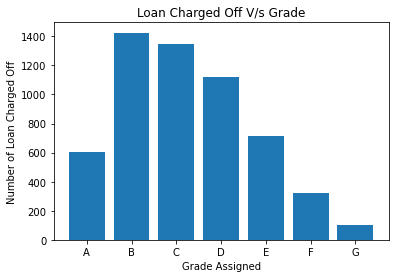

In [6]:
# Compare Grade V/s Defaults
# Segmented Univariate Analysis of grade w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to grade

# get the Unique values in grade
grade_u = sorted(df["grade"].unique())

Default_Vs_grade=[]

# Loop Through each unique value in grade Duration and then Search for Charged Off in Loan Status to get the Count for that grade
for tm in grade_u:
    grade_filter=df[df["grade"] == tm]
    Default_Vs_grade.append(len(grade_filter[grade_filter["loan_status"]=="Charged Off"]))


print(grade_u)
print(Default_Vs_grade)
#fig=plt.figure(figsize=(30,20))
plt.bar(grade_u, Default_Vs_grade)
plt.xlabel("Grade Assigned")
plt.ylabel("Number of Loan Charged Off")
plt.title("Loan Charged Off V/s Grade")

# Save the Plot
#plt.savefig("Grade_dist_defaulter.pdf", dpi=100, bbox_inches='tight')

## SUMMARY : helpful in risk assessment : PARTIAL
###    Although Data shows the Number of Defaulters decrease from B -> G grade with highest number of Defaults are in Grade B and C .
###    Data may not be conculsive as Grade B and C are theoritcally lesser risk but seems to be having higher defaults some may be other factors are contributing

Text(0.5, 1.0, 'Loan Charged Off V/s Interest Rate')

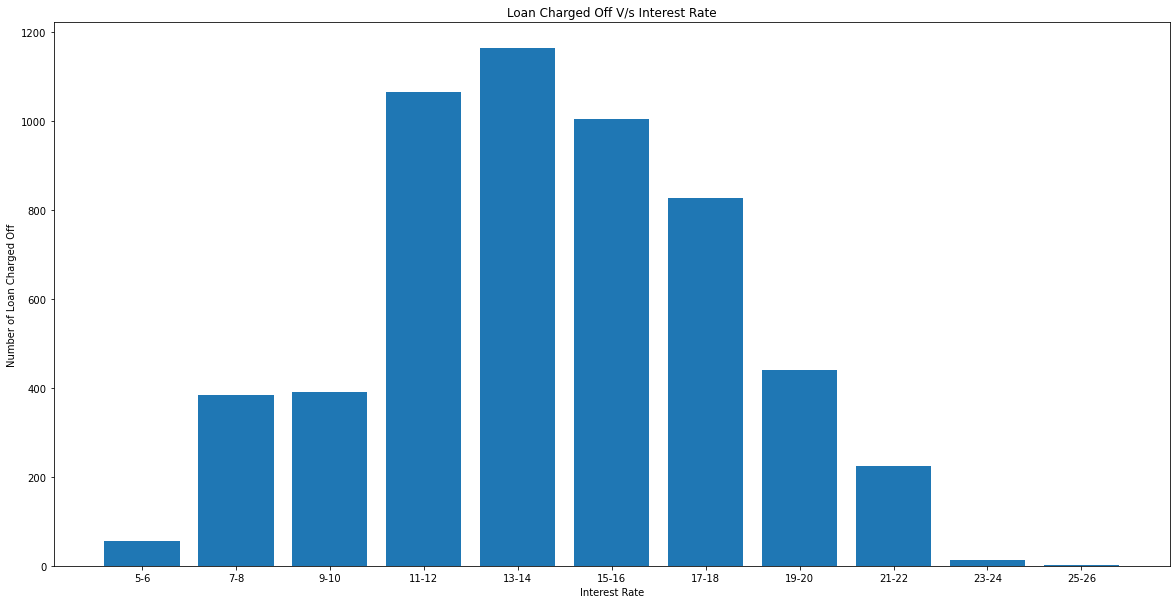

In [7]:
# Segmented Univariate Analysis of Interest Rate w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to Interest Rate

# get the Unique values in grade
intrate_u = df["int_rate"].unique()


Default_Vs_intrate=[0,0,0,0,0,0,0,0,0,0,0]

# Interest rate buckets
intrate_buckets=[0,1,2,3,4,5,6,7,8,9,10]
intrate_buckets_labels=["5-6","7-8","9-10","11-12","13-14","15-16","17-18","19-20","21-22","23-24","25-26"]


# Loop Through each unique value in grade Duration and then Search for Charged Off in Loan Status to get the Count for that Interest Rate
for tm in intrate_u:
    intrate_filter=df[df["int_rate"] == tm]
    
    if(float(tm) >= 5.0 and float(tm) <= 6.0):
        Default_Vs_intrate[0] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 6.0 and float(tm) <= 8.0):
        Default_Vs_intrate[1] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 8 and float(tm) <= 10):
        Default_Vs_intrate[2] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 10 and float(tm) <= 12):
        Default_Vs_intrate[3] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 12 and float(tm) <= 14):
        Default_Vs_intrate[4] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])        
    if(float(tm) > 14 and float(tm) <= 16):
        Default_Vs_intrate[5] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 16 and float(tm) <= 18):
        Default_Vs_intrate[6] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 18 and float(tm) <= 20):
        Default_Vs_intrate[7] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 20 and float(tm) <= 22):
        Default_Vs_intrate[8] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 23 and float(tm) <= 24):
        Default_Vs_intrate[9] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
    if(float(tm) > 24 and float(tm) <= 26):
        Default_Vs_intrate[10] += len(intrate_filter[intrate_filter["loan_status"]=="Charged Off"])
        

fig=plt.figure(figsize=(20,10))
plt.bar(intrate_buckets_labels, Default_Vs_intrate)
plt.xlabel("Interest Rate")
plt.ylabel("Number of Loan Charged Off")
plt.title("Loan Charged Off V/s Interest Rate")

# Save the Plot
#plt.savefig("IntRate_dist_defaulter.pdf", dpi=100, bbox_inches='tight')


## SUMMARY : helpful in risk assessment : YES
###  More Number of Defaulters are observed with Interest Rates greater than 10% till 18% . 

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
[2839, 443, 2327, 18, 0]


Text(0.5, 1.0, 'Loan Charged Off V/s Home Ownership')

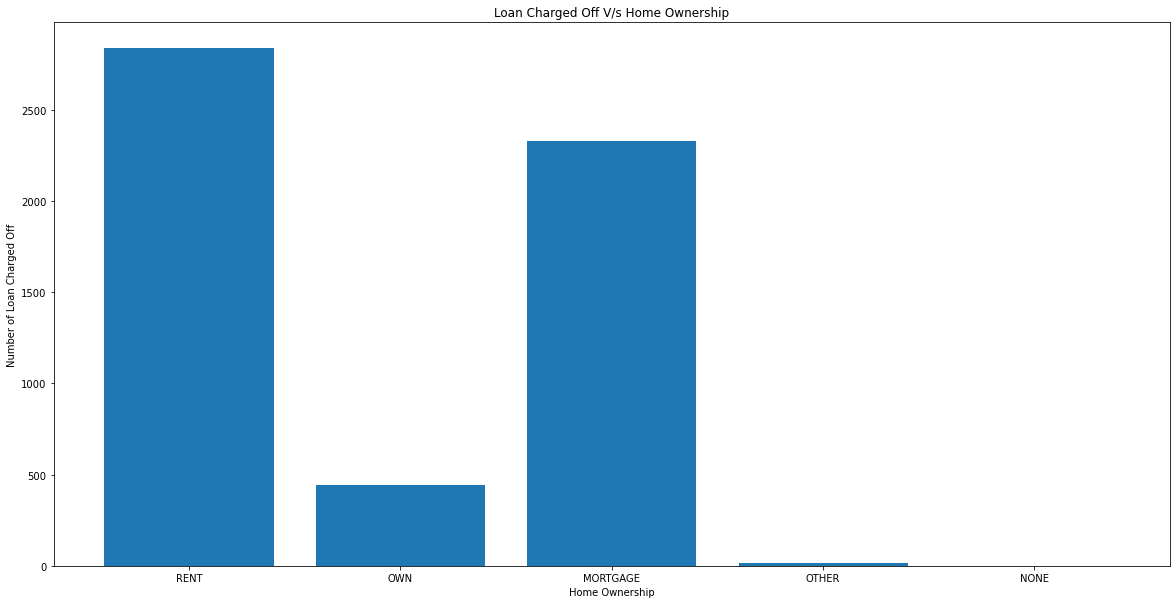

In [8]:
# Compare Home Ownership V/s Number of Defaulters
# Segmented Univariate Analysis of Home Ownership w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to Home Ownership

# get the Unique values in grade
homeown_u = df["home_ownership"].unique()

Default_Vs_homeown=[]

# Loop Through each unique value in grade Duration and then Search for Charged Off in Loan Status to get the Count for that Home Onwership
for tm in homeown_u:
    homeown_filter=df[df["home_ownership"] == tm]
    Default_Vs_homeown.append(len(homeown_filter[homeown_filter["loan_status"]=="Charged Off"]))


print(homeown_u)
print(Default_Vs_homeown)

fig=plt.figure(figsize=(20,10))
plt.bar(homeown_u, Default_Vs_homeown)
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loan Charged Off")
plt.title("Loan Charged Off V/s Home Ownership")

# Save the Plot
#plt.savefig("HomeOwn_dist_defaulter.pdf", dpi=100, bbox_inches='tight')

## SUMMARY - helpful in risk assessment : Yes
###  Data shows More defaulters are with RENT and MORTGAGE House ownership - So Higher Risk
###  Applicants with Own house have lesser tendency of defaulting


['10 ' ' 1 ' '1 ' '3 ' '8 ' '9 ' '4 ' '5 ' '6 ' '2 ' '7 ']
[1331, 639, 456, 555, 203, 158, 462, 458, 307, 567, 263]


Text(0.5, 1.0, 'Loan Charged Off V/s Employment Length')

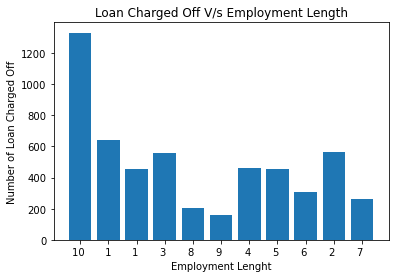

In [9]:
# Segmented Univariate Analysis of Employment Lenght w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to Employment Lenght

# get the Unique values in grade
emplen_u = df["emp_length"].dropna().unique()

Default_Vs_emplen=[]

# Loop Through each unique value in grade Duration and then Search for Charged Off in Loan Status to get the Count for that Employment Lenght
for tm in emplen_u:
    emplen_filter=df[df["emp_length"] == tm]
    Default_Vs_emplen.append(len(emplen_filter[emplen_filter["loan_status"]=="Charged Off"]))

print(emplen_u)
print(Default_Vs_emplen)
plt.bar(emplen_u, Default_Vs_emplen)
plt.xlabel("Employment Lenght")
plt.ylabel("Number of Loan Charged Off")
plt.title("Loan Charged Off V/s Employment Length")

# Save the Plot
#plt.savefig("Emplen_dist_defaulter.pdf", dpi=100, bbox_inches='tight')

## SUMMARY : helpful in risk assessment : Yes
###  More numbers of Defaulters are observed with 10+ years and < 1years of Employment lenght 
### Highest defaulters are with 10+ years of experience 
### Lesser risk on defaults for employment range b/w 1 - 9 years

[29, 597, 1005, 1402, 1389, 1118, 87, 0]


Text(0.5, 1.0, 'Loan Charged Off V/s dti')

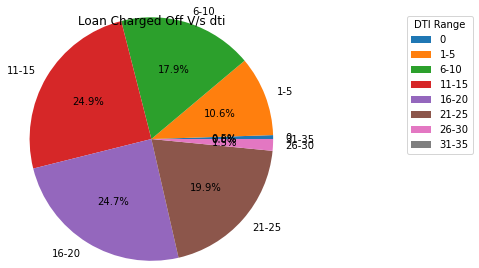

In [10]:
# Segmented Univariate Analysis of dti w.r.t Loan Defaults/Charged Off
# Bar Chart shows the Number of Loan Defaults/Charged Off as compared to dti

# get the Unique values in dti
dti_u = df["dti"].unique()

Default_Vs_dti=[0,0,0,0,0,0,0,0]
dti_buckets=[0,1,2,3,4,5,6,7]
dti_buckets_labels=["0","1-5","6-10","11-15","16-20","21-25","26-30","31-35"]

# Loop Through each unique value in grade Duration and then Search for Charged Off in Loan Statthe Count for that dti
for tm in dti_u:
    dti_filter=df[df["dti"] == tm]
    if(tm <= 0):
        Default_Vs_dti[0] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 0 and tm <= 5):
        Default_Vs_dti[1] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 5 and tm <= 10):
        Default_Vs_dti[2] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 10 and tm <= 15):
        Default_Vs_dti[3] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 15 and tm <= 20):
        Default_Vs_dti[4] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 20 and tm <= 25):
        Default_Vs_dti[5] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 25 and tm <= 30):
        Default_Vs_dti[6] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))
    if(tm > 30 and tm <= 35):
        Default_Vs_dti[7] += (len(dti_filter[dti_filter["loan_status"]=="Charged Off"]))


print(Default_Vs_dti)

plt.pie(Default_Vs_dti,labels=dti_buckets_labels, autopct='%1.1f%%', radius=1.4)
plt.legend(loc="right", bbox_to_anchor=(2,0.75), title="DTI Range")
plt.title("Loan Charged Off V/s dti")

# Save the Plot
#plt.savefig("DTI_dist_defaulter.pdf", dpi=100, bbox_inches='tight')


## SUMMARY : helpful in risk assessment : YES
#### High probability of laan defaults with higher DTI range b/w 1-25 .
###  DTI can be an indiator of Credit Risk

[' 36 ', ' 60 ']
['A', 'B', 'C', 'D', 'E', 'F', 'G']


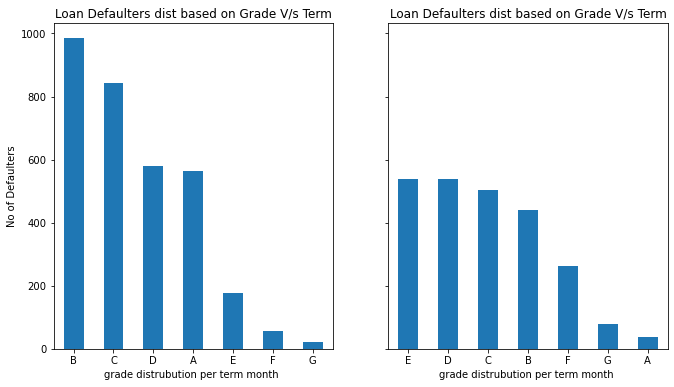

In [11]:
# Bivariate Analysis of  Grade V/s Term

# Default List
default_list = df[df["loan_status"] == "Charged Off"]
term_unique = sorted(default_list["term"].unique())
grade_unique = sorted(default_list["grade"].unique())

print(term_unique)
print(grade_unique)


rows, cols = 1, 2

fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(11,6))
x=0

# Loop Through each unique value of term to get distribution of defaulters w.r.t Grade 
for tm in term_unique:
    grade_filter_bivar=default_list[default_list["term"] == tm]
    #print(grade_filter_bivar["grade"].value_counts())
    grade_filter_bivar["grade"].value_counts().plot(kind='bar', rot=0, ax=ax[x], xlabel="grade distrubution per term month ", ylabel="No of Defaulters",title='Loan Defaulters dist based on Grade V/s Term')
    x+=1

# Save the Plot
#plt.savefig("Grade_Term_BiVar_defaulter.pdf", dpi=100, bbox_inches='tight')

## SUMMARY
### Graph 1- Shows the Grade distribution of defaulters w.r.t Term = 36 months
### Graph 2- Shows the Grade distribution of defaulters w.r.t Term = 60 months
### Grade B, C, D are the TOP 3 defaulters in both Terms - 36 and 60 months
   

[' 36 ', ' 60 ']
['car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']
debt_consolidation    1469
other                  414
credit_card            318
small_business         269
home_improvement       205
major_purchase         137
car                     82
moving                  74
medical                 71
wedding                 60
educational             49
vacation                38
house                   28
renewable_energy        13
Name: purpose, dtype: int64
debt_consolidation    1298
credit_card            224
other                  219
small_business         206
home_improvement       142
major_purchase          85
car                     78
wedding                 36
medical                 35
house                   31
moving                  18
vacation                15
educational              7
renewable_energy         6
N

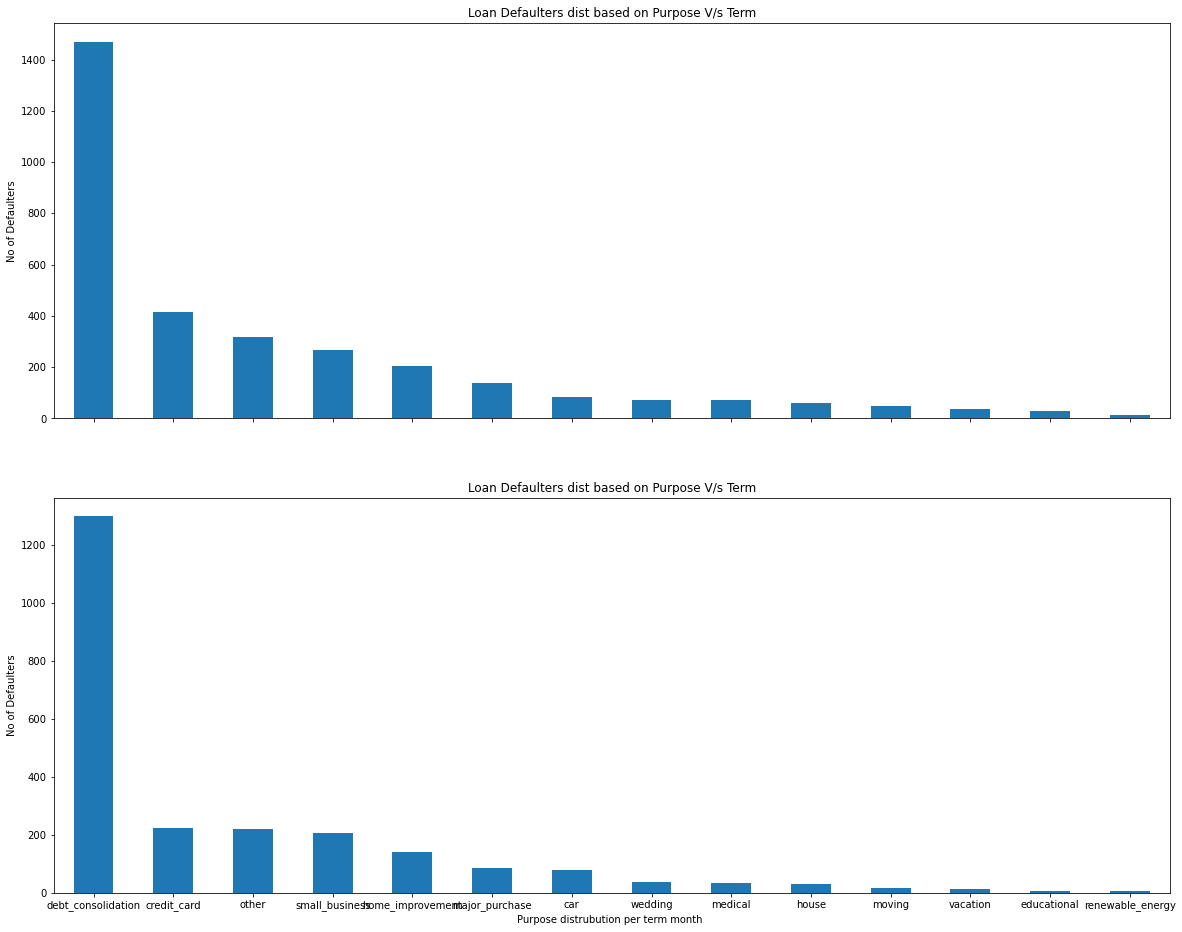

In [12]:
# Bivariate Analysis of  Purpose V/s term

# Default List
default_list = df[df["loan_status"] == "Charged Off"]
term_unique = sorted(default_list["term"].unique())
purpose_unique = sorted(default_list["purpose"].unique())

print(term_unique)
print(purpose_unique)

rows, cols = 2, 1

fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(20,16))
x=0

# Loop Through each unique value of term to get distribution of defaulters w.r.t Grade 
for tm in term_unique:
    purpose_filter_bivar=default_list[default_list["term"] == tm]
    print(purpose_filter_bivar["purpose"].value_counts())
    purpose_filter_bivar["purpose"].value_counts().plot(kind='bar', rot=0, ax=ax[x], xlabel="Purpose distrubution per term month ", ylabel="No of Defaulters",title='Loan Defaulters dist based on Purpose V/s Term')
    x+=1

# Save the Plot
#plt.savefig("Purpose_Term_BiVar_defaulter.pdf", dpi=100, bbox_inches='tight')
    
## SUMMARY
### Graph 1- Shows the Purpose distribution of defaulters w.r.t Term = 36 months
### Graph 2- Shows the Purpose distribution of defaulters w.r.t Term = 60 months
### Debt Consolidation, Credit Card and Others Purposes  are the TOP 3 defaulters in both Terms - 36 and 60 months
   